In [113]:
from datetime import datetime, date
from pytz import timezone
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations, units
import numpy as np

In [114]:
# Set time period
end = datetime.now()
start = datetime(end.year - 50, end.month, end.day)
# start = datetime(1973, 1, 1)

# Create Point for Vancouver, BC
nyc = Point(40.7789, -73.9692, 3.0)

# Get daily data for 2018
data = Daily(nyc, start, end)
data = data.convert(units.imperial)
data = data.fetch()

daily_max = data.tmax

In [116]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1973-06-01,69.4,59.0,80.1,0.051,0.0,NaN,9.9,NaN,1015.8,NaN
1973-06-02,69.1,64.0,78.1,0.000,0.0,NaN,8.4,NaN,1016.9,NaN
1973-06-03,63.7,59.0,70.9,0.012,0.0,94.0,8.4,NaN,1021.5,NaN
1973-06-04,72.0,61.9,86.9,0.051,0.0,217.0,7.5,NaN,1018.2,NaN
1973-06-05,76.3,68.0,88.9,0.000,0.0,186.0,7.8,NaN,1019.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN


In [117]:
data['month'], data['day'] = data.index.month, data.index.day


In [118]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month,day
time,,,,,,,,,,,,
1973-06-01,69.4,59.0,80.1,0.051,0.0,NaN,9.9,NaN,1015.8,NaN,6,1
1973-06-02,69.1,64.0,78.1,0.000,0.0,NaN,8.4,NaN,1016.9,NaN,6,2
1973-06-03,63.7,59.0,70.9,0.012,0.0,94.0,8.4,NaN,1021.5,NaN,6,3
1973-06-04,72.0,61.9,86.9,0.051,0.0,217.0,7.5,NaN,1018.2,NaN,6,4
1973-06-05,76.3,68.0,88.9,0.000,0.0,186.0,7.8,NaN,1019.1,NaN,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,67.8,60.1,78.1,0.000,NaN,218.0,3.5,NaN,1020.0,NaN,5,28
2023-05-29,69.1,61.0,79.0,0.000,NaN,71.0,6.8,NaN,1017.3,NaN,5,29
2023-05-30,61.9,55.4,71.1,0.000,NaN,68.0,5.4,NaN,1022.8,NaN,5,30


In [119]:
daily_max_avg = data.tmax.groupby(by=[data.month, data.day]).mean()
daily_max_max = data.tmax.groupby(by=[data.month, data.day]).max()

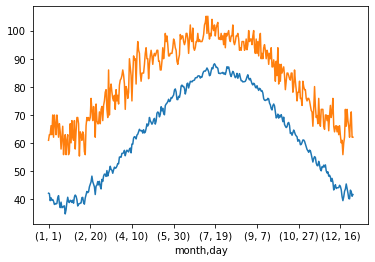

In [120]:
daily_max_avg.plot()
daily_max_max.plot()
plt.show()